<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/2/MLP_NN_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import datetime

import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle



In [2]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

### Data

In [3]:
## First load the data from the following url
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )

data = shuffle(data)

'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
data.head()

,id,p,theta,beta,nphe,ein,eout
1640065,2212,0.994430,0.513494,0.710614,0,0.085603,0.000000
3923151,211,2.026550,0.201995,0.992739,0,0.026368,0.047288
4066649,211,0.794537,0.486123,0.997970,0,0.024353,0.085924
962336,2212,1.028150,0.307077,0.725036,0,0.106661,0.067933
4096345,2212,1.687340,0.195407,0.893784,0,0.105013,0.044175


In [4]:
## Targets
targets = list(set(data['id']))
print(targets)
target_freq = Counter(data['id'])


features =  data.columns 
print(features)


[321, 211, 2212, -11]
Index(['id', 'p', 'theta', 'beta', 'nphe', 'ein', 'eout'], dtype='object')


In [5]:
## We only keep two features, this is for simplicity and also for visulaization purposes. 
features_2d = features[[0,1,3]]


## To speed things up in the class we take a small sample of the data

n_s = 10000  ## number of samples we keep. 

mini_data = data[features_2d].sample(n_s, axis=0, random_state=0)

mini_data['target'] = mini_data['id'].apply(lambda x: targets.index(x)) ## We add a label/target/class col which is the index of the id in the list of ids.

mini_data.drop('id',axis=1, inplace=True)
mini_data.head()


,p,beta,target
730028,1.018540,0.724876,2
1736847,2.810560,0.937268,2
25746,2.505070,0.986875,1
1531374,0.953231,0.997742,1
504261,3.142600,0.967875,2


In [6]:
X, Y = mini_data[['p','beta']].values, mini_data.target.values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

In [7]:
## We only keep the following two targets
## We intentionally pick two classes with the largest bias. 
ind_1 = 1
ind_2 =  2
print('The ratio of the number of the samples of the two classes are {}'.format( target_freq[targets[ind_1]]/target_freq[targets[ind_2]] ) )


## Only keep the part of the data with one of the two target classes. 
bmd = mini_data[ (mini_data['target']==ind_1) | (mini_data['target']==ind_2) ].copy()


X = bmd.drop('target', axis=1).values
Y = (bmd['target'].values >1.5).astype(int)
print(Counter(Y))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

The ratio of the number of the samples of the two classes are 1.4424721548280468
Counter({0: 5564, 1: 3904})


# Tensorflow

There are many different frameworks and APIs for deep learning and neural networks. 

Here you learn more about them and how they compare to each other:  
https://wiki.pathmind.com/comparison-frameworks-dl4j-tensorflow-pytorch

Here we focus on Tensorflow (Keras) and Pytorch as the two main tools that we'll be using.

## Old version and the computation graph

In [8]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

%load_ext tensorboard


TensorFlow 1.x selected.
1.15.2


In [16]:
###1. Simple Algebra

a = tf.Variable(1, name='a')
b = tf.Variable(2, name='b')

f = a + b

print(f)

Tensor("add_1:0", shape=(), dtype=int32)


In [11]:
a

<tf.Variable 'a:0' shape=() dtype=int32_ref>

In [13]:
init = tf.global_variables_initializer()

with tf.Session() as s:
    init.run()
    print(b.eval())
    

    print(f.eval() )


2
3


In [14]:
# del( f, init)

In [17]:
init = tf.global_variables_initializer()
 
# Clear any logs from previous runs
!rm -rf ./logs/ 

log_file = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# log_Name = 'Simple_Addition'

with tf.Session() as s:
    file_writer = tf.summary.FileWriter(log_file, s.graph)
    init.run()
    print(f.eval() )

3


In [ ]:
%tensorboard --logdir logs/fit


In [19]:
###2. Simple Optimization Problem

w = tf.Variable([0], dtype=tf.float32)
f = w**2 -10 * w + 25

optimize = tf.train.GradientDescentOptimizer(0.01).minimize(f)

init = tf.global_variables_initializer()

## Add Tensor board
# Clear any logs from previous runs
!rm -rf ./logs/ 

log_file = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# log_Name = 'Simple_Addition'


with tf.Session() as s:
    file_writer = tf.summary.FileWriter(log_file, s.graph)
    init.run()
    print(w.eval() )
    
    for i in range(1000):
        s.run(optimize)
    
    print(w.eval())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[0.]
[4.999988]


In [ ]:
%tensorboard --logdir logs/fit

In [22]:
###3. Optimization with Variable inputs

X = tf.placeholder(tf.float32, [3,1])
w = tf.Variable([0], dtype=tf.float32)
f = X[0][0] * w**2 -X[1][0] * w + X[2][0] 

coefs = np.array( [[1] , [-12], [36] ] )

optimize = tf.train.GradientDescentOptimizer(0.01).minimize(f)

init = tf.global_variables_initializer()

## Add Tensor board
# Clear any logs from previous runs
!rm -rf ./logs/ 

log_file = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# log_Name = 'Simple_Addition'


with tf.Session() as s:
  file_writer = tf.summary.FileWriter(log_file, s.graph)
  init.run()
  print(w.eval() )
  
  for i in range(1000):
      s.run(optimize, feed_dict = {X:coefs})
  
  print(w.eval())	



[0.]
[-5.999988]


In [ ]:
!kill 869

In [ ]:
%tensorboard --logdir logs/fit

## Keras

Need to restart runtime and start with the latest version of TF.

In [8]:
from tensorflow import keras as ks

In [9]:
print(X_train.shape)
print( Counter(Y_train) )

(7101, 2)
Counter({0: 4183, 1: 2918})


In [25]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(10, activation=ks.activations.relu, input_dim = 2)  )
model.add(ks.layers.Dense(10, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid)  )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile( loss=ks.losses.binary_crossentropy  , 
              optimizer = ks.optimizers.SGD() ,  
              metrics = ks.metrics.binary_accuracy )

In [27]:
print(Counter(Y))
model.predict(X_test[:3])

Counter({0: 5564, 1: 3904})


array([[0.44345385],
       [0.51097715],
       [0.5336526 ]], dtype=float32)

In [28]:
## Let's try this for the particle identification 
history = model.fit(X_train, Y_train, 
                    epochs=50 
                    )


Epoch 1/50
222/222 [==============================] - 1s 4ms/step - loss: 0.6209 - binary_accuracy: 0.6189
Epoch 2/50
222/222 [==============================] - 1s 3ms/step - loss: 0.5860 - binary_accuracy: 0.6216
Epoch 3/50
222/222 [==============================] - 1s 4ms/step - loss: 0.5572 - binary_accuracy: 0.6357
Epoch 4/50
222/222 [==============================] - 1s 4ms/step - loss: 0.5304 - binary_accuracy: 0.6567
Epoch 5/50
222/222 [==============================] - 1s 4ms/step - loss: 0.5006 - binary_accuracy: 0.6937
Epoch 6/50
222/222 [==============================] - 1s 3ms/step - loss: 0.4721 - binary_accuracy: 0.7469
Epoch 7/50
222/222 [==============================] - 1s 4ms/step - loss: 0.4431 - binary_accuracy: 0.8137
Epoch 8/50
222/222 [==============================] - 1s 4ms/step - loss: 0.4130 - binary_accuracy: 0.8648
Epoch 9/50
222/222 [==============================] - 1s 3ms/step - loss: 0.3812 - binary_accuracy: 0.8724
Epoch 10/50
222/222 [================

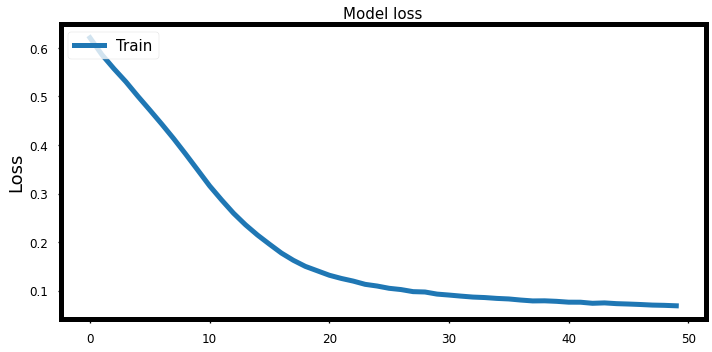

In [29]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

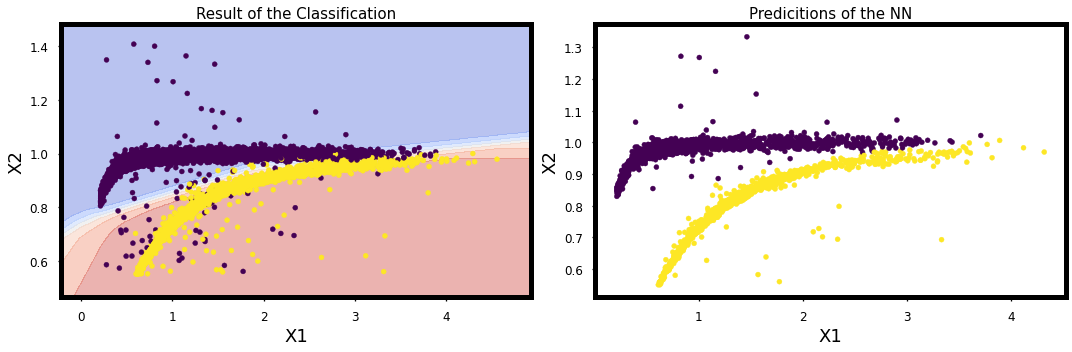

In [30]:
#predictions of the model for test set
y_predict = (model.predict(X_test)>.5).astype(int)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'X1', ylabel='X2', title = 'Predicitions of the NN')
plt.scatter(*X_test.T, c = y_predict.reshape(-1))


plt.tight_layout()
plt.show()

### More structured

In [31]:
n_epoch=20
btch_size = 100
lr = .1

In [32]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(10, activation=ks.activations.relu, input_dim = 2)  )
model.add(ks.layers.Dense(10, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid)  )


model.compile(  
    optimizer=ks.optimizers.SGD(learning_rate=lr ), 
    loss = ks.losses.mse, 
    metrics = 'acc'    
)

In [33]:
# Tensorboard
# https://www.tensorflow.org/tensorboard/get_started
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = ks.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit( x=X_train, 
          y=Y_train, 
          epochs=n_epoch,
          batch_size = btch_size, 
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])


Epoch 1/20
72/72 [==============================] - 1s 8ms/step - loss: 0.2393 - acc: 0.5868 - val_loss: 0.2308 - val_acc: 0.5948
Epoch 2/20
72/72 [==============================] - 0s 6ms/step - loss: 0.2220 - acc: 0.6110 - val_loss: 0.2181 - val_acc: 0.5851
Epoch 3/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2092 - acc: 0.6426 - val_loss: 0.2038 - val_acc: 0.6789
Epoch 4/20
72/72 [==============================] - 0s 5ms/step - loss: 0.1971 - acc: 0.6831 - val_loss: 0.1973 - val_acc: 0.5877
Epoch 5/20
72/72 [==============================] - 0s 5ms/step - loss: 0.1861 - acc: 0.6933 - val_loss: 0.1835 - val_acc: 0.6595
Epoch 6/20
72/72 [==============================] - 0s 5ms/step - loss: 0.1730 - acc: 0.7389 - val_loss: 0.1762 - val_acc: 0.6003
Epoch 7/20
72/72 [==============================] - 0s 5ms/step - loss: 0.1605 - acc: 0.8066 - val_loss: 0.1545 - val_acc: 0.8462
Epoch 8/20
72/72 [==============================] - 0s 5ms/step - loss: 0.1461 - acc: 0.84

### Visualization

In [ ]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


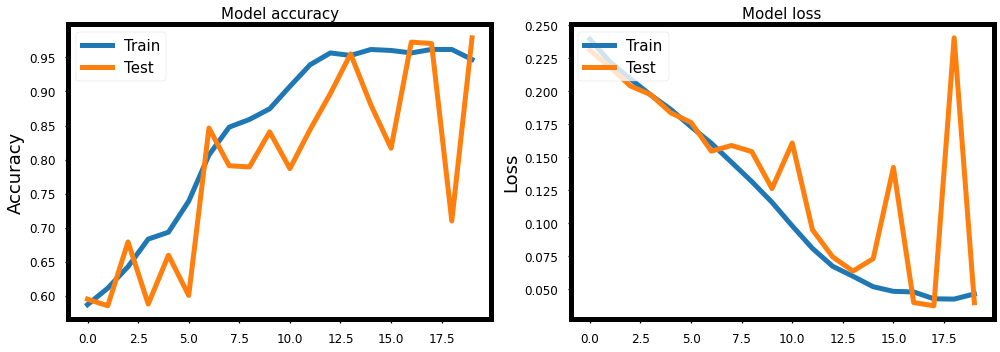

In [34]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
%tensorboard --logdir logs/fit

### Saving and loading models

For more info see

https://www.tensorflow.org/guide/keras/save_and_serialize

In [36]:
path = 'keras_test_model'
model.save(path)


INFO:tensorflow:Assets written to: keras_test_model/assets


In [37]:
new_model = ks.models.load_model(path)
new_model.predict(X_test[:3])

array([[0.02619186],
       [0.04496951],
       [0.72316116]], dtype=float32)

# Pytorch

In [38]:
import torch

This is prepared mainly based on the tutorial from the official website and some other sources:

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Basics

### Pytorch as alternative to numpy

In [39]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
### A bunch of zeros
a = torch.zeros( (2,3))
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [41]:
a = torch.rand( 2,3 )
a

tensor([[0.0414, 0.5257, 0.8193],
        [0.6104, 0.5448, 0.7749]])

### Converting numpy array to tensor and reverse

In [42]:
# We can convert our np arrays to tensors
a = np.random.uniform(0,3, size = (2,3))
a = torch.tensor(a)
# a = torch.from_numpy(a)
a

tensor([[0.3944, 0.8824, 2.3419],
        [2.8303, 2.5990, 0.4919]], dtype=torch.float64)

In [43]:
a.numpy()

array([[0.39442944, 0.88242436, 2.34187879],
       [2.83030719, 2.59900584, 0.49192162]])

In [44]:
a

tensor([[0.3944, 0.8824, 2.3419],
        [2.8303, 2.5990, 0.4919]], dtype=torch.float64)

In [46]:
print(a)

a_np = a.numpy()
print(a_np)


# The value of the numpy version is linked to the original tensor. 
a+=1
print('\n The value of a is updated. \n')
print(a)

print(a_np)



tensor([[1.3944, 1.8824, 3.3419],
        [3.8303, 3.5990, 1.4919]], dtype=torch.float64)
[[1.39442944 1.88242436 3.34187879]
 [3.83030719 3.59900584 1.49192162]]

 The value of a is updated. 

tensor([[2.3944, 2.8824, 4.3419],
        [4.8303, 4.5990, 2.4919]], dtype=torch.float64)
[[2.39442944 2.88242436 4.34187879]
 [4.83030719 4.59900584 2.49192162]]


### Tensor operations

In [47]:
print(a)

## Similar to numpy, values are broadcasted.
print(a+1)

tensor([[2.3944, 2.8824, 4.3419],
        [4.8303, 4.5990, 2.4919]], dtype=torch.float64)
tensor([[3.3944, 3.8824, 5.3419],
        [5.8303, 5.5990, 3.4919]], dtype=torch.float64)


In [48]:
b = torch.tensor(np.random.uniform( 0,3, (2,3) )  )

#Transposition
b.t()

tensor([[2.1256, 2.4286],
        [2.3388, 1.5498],
        [2.9496, 1.8113]], dtype=torch.float64)

In [49]:
#Shape
print(f"The shape of b is {b.size()}."  )

#Reshape
print(f"We can flatten b to {b.view(-1)}."  )

The shape of b is torch.Size([2, 3]).
We can flatten b to tensor([2.1256, 2.3388, 2.9496, 2.4286, 1.5498, 1.8113], dtype=torch.float64).


In [50]:
# Matrix Multipication
print(f"The matrix multipication of a.b is \n{torch.mm(a , b.t())  }."  )


The matrix multipication of a.b is 
tensor([[24.6375, 18.1467],
        [28.3733, 23.3721]], dtype=torch.float64).


In [51]:
# Or we can do
a.mm(b.t())

tensor([[24.6375, 18.1467],
        [28.3733, 23.3721]], dtype=torch.float64)

### Empty tensors

In [52]:
x = torch.empty((2,2),dtype=torch.float64)

x

tensor([[4.6672e-310, 1.1858e-322],
        [ 2.8373e+01, 1.7456e+238]], dtype=torch.float64)

In [53]:
torch.mm(a , b.t(), out = x)

print(f"x is now updated to\n{x}.")

x is now updated to
tensor([[24.6375, 18.1467],
        [28.3733, 23.3721]], dtype=torch.float64).


### GPU

One cool feature of pytorch is that it presents a cool alternative to numpy but with the advantage that the operations can be run on GPU. Note that that numpy arrays and operations are not GPU enabled (at least not out of the box).

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [55]:
a = np.random.uniform(0,3, size = (2,3))
print(a)
# a = torch.tensor(a, device=device, dtype = torch.int)
a = torch.from_numpy(a).to(device)
a

[[1.93446793 1.22842365 0.84499213]
 [1.42445614 1.41918468 2.20524853]]


tensor([[1.9345, 1.2284, 0.8450],
        [1.4245, 1.4192, 2.2052]], device='cuda:0', dtype=torch.float64)

#### Speedup over GPU.

In [57]:
%%time
d_mat = 10**4
a = np.random.rand(d_mat, d_mat)
b = np.random.rand(d_mat, d_mat)


CPU times: user 1.84 s, sys: 986 ms, total: 2.82 s
Wall time: 2.81 s


In [58]:
%%time
for i in range(10):
  c = a+b

CPU times: user 27.3 s, sys: 784 ms, total: 28 s
Wall time: 27.5 s


In [59]:
a_t = torch.tensor(a)
b_t = torch.tensor(b)

In [62]:
%%time
for i in range(100):
  c_t = a_t+b_t

CPU times: user 32.9 s, sys: 1.76 s, total: 34.7 s
Wall time: 32.6 s


In [63]:
a_t = torch.tensor(a, device=device)
b_t = torch.tensor(b, device=device)

In [64]:
%%time
for i in range(100):
  c_t = a_t+b_t

CPU times: user 2.17 ms, sys: 4.26 ms, total: 6.43 ms
Wall time: 9.87 ms


#### But be careful, it is not always wise to use GPU.

In [65]:
%%time
## Let's compare the speed. 
n_run = 10**6
a = np.ones((3,3))

for i in range(n_run):
    np.matmul(a,a)



CPU times: user 1.7 s, sys: 11.5 ms, total: 1.71 s
Wall time: 1.72 s


In [66]:
%%time
## Let's compare the speed. 
n_run = 10**6
a = np.ones((3,3))

for i in range(n_run):
    np.dot(a,a)



CPU times: user 1.54 s, sys: 1.53 ms, total: 1.54 s
Wall time: 1.54 s


In [67]:
%%time
## Let's compare the speed. 
n_run = 10**6
a = torch.ones((3,3), device=device)

for i in range(n_run):
    torch.mm(a,a)



CPU times: user 9.94 s, sys: 376 ms, total: 10.3 s
Wall time: 10.4 s


## Autograd

In [68]:
import torch

In [69]:
'''
We can specify the parameters that we want to track for optimization. 
For this we set the requires_grad to True. 
This means that for all the following computations, for any function 
of the variable, the respective derivatives will be kept. 
'''
a = torch.rand(1,3, requires_grad=True)
b = torch.rand(3,1, requires_grad = True)
print(a)
print(b)

tensor([[0.7069, 0.1876, 0.1994]], requires_grad=True)
tensor([[0.8637],
        [0.8889],
        [0.0461]], requires_grad=True)


In [70]:
'''
Take this function for example. 
If you look at it, you'll see that it has an extra element, the grad_fn. 
This is in fact dy(a)/da.
'''
y = (a + 2).mean()
# y = torch.mm(a,b)
print( f'The gradient function is {y.grad_fn}.\n' )
y

The gradient function is <MeanBackward0 object at 0x7f4648228490>.



tensor(2.3646, grad_fn=<MeanBackward0>)

In [71]:
'''
Now if we want to calculate the derivatives with respect to the variable, 
we can simply call the backward() method on the output/final variable. 
'''
y.backward()
print(a.grad)
print(b.grad)

tensor([[0.3333, 0.3333, 0.3333]])
None


In [72]:
'''
You need to be careful when you calculate the gradients with this. 
It accumulates the gradients, 
'''
for i in range(3):
    y.backward()
    print(a.grad, '\n')

tensor([[0.6667, 0.6667, 0.6667]]) 

tensor([[1., 1., 1.]]) 

tensor([[1.3333, 1.3333, 1.3333]]) 



In [73]:
'''
So we would need to reset the grad of the variable, i.e.
'''
a.grad.zero_()

print(a.grad, '\n')

y.backward()
print(a.grad)



tensor([[0., 0., 0.]]) 

tensor([[0.3333, 0.3333, 0.3333]])


In [76]:
### Multidimensional output
z = 2 * a
print(z)
a.grad.zero_()

z.backward(torch.tensor([[0,1,1]]))

a.grad

tensor([[1.4138, 0.3752, 0.3988]], grad_fn=<MulBackward0>)


tensor([[0., 2., 2.]])

#### Simple Optimization Example

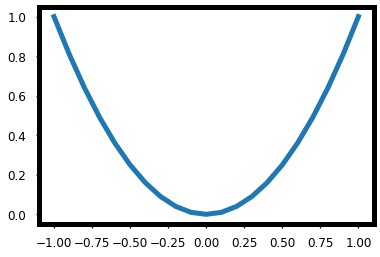

In [77]:
x_list = np.arange(-1,1.1,.1)
y_list = x_list**2

plt.plot(x_list, y_list)

In [78]:
import torch
import numpy as np
# y.backward()
# x.grad + x


n_itr = 10
lr = .1

x = torch.tensor(.5, requires_grad=True)
x_hist = [x.detach().numpy().copy() ]

for i in range(n_itr):
  y = x**2
  print(f'for iteration {i}, we get:')
  y.backward()
  print(f' The derivative is: {x.grad}')
  print(f' and x is {x}. \n')
  with torch.no_grad():
    x -= lr * x.grad
  # x.requires_grad_ = True
  # print(x.grad)
  x.grad.zero_()
  x_hist +=[x.detach().numpy().copy() ]
    

x_hist = np.array(x_hist)

for iteration 0, we get:
 The derivative is: 1.0
 and x is 0.5. 

for iteration 1, we get:
 The derivative is: 0.800000011920929
 and x is 0.4000000059604645. 

for iteration 2, we get:
 The derivative is: 0.6399999856948853
 and x is 0.3199999928474426. 

for iteration 3, we get:
 The derivative is: 0.5119999647140503
 and x is 0.25599998235702515. 

for iteration 4, we get:
 The derivative is: 0.4095999598503113
 and x is 0.20479997992515564. 

for iteration 5, we get:
 The derivative is: 0.32767996191978455
 and x is 0.16383998095989227. 

for iteration 6, we get:
 The derivative is: 0.26214396953582764
 and x is 0.13107198476791382. 

for iteration 7, we get:
 The derivative is: 0.20971517264842987
 and x is 0.10485758632421494. 

for iteration 8, we get:
 The derivative is: 0.16777214407920837
 and x is 0.08388607203960419. 

for iteration 9, we get:
 The derivative is: 0.13421770930290222
 and x is 0.06710885465145111. 



In [79]:
x = torch.tensor(.5, requires_grad=True)
y = x**2

x_opt = x.detach().numpy()
x_hist = [x_opt.copy() ]
n_itr = 10
lr = .1


for i in range(n_itr):

    x = torch.tensor(x_opt , requires_grad=True)
#     print(x)
    y = x**2
    
    y.backward()
#     print(x.grad)
    # x_opt = x_opt - lr*dy/dx
    x_opt -= lr * x.grad.numpy()
    x_hist +=[x_opt.copy()]
    

x_hist = np.array(x_hist)

The value of the x after 10 iterations is 0.06710885465145111.



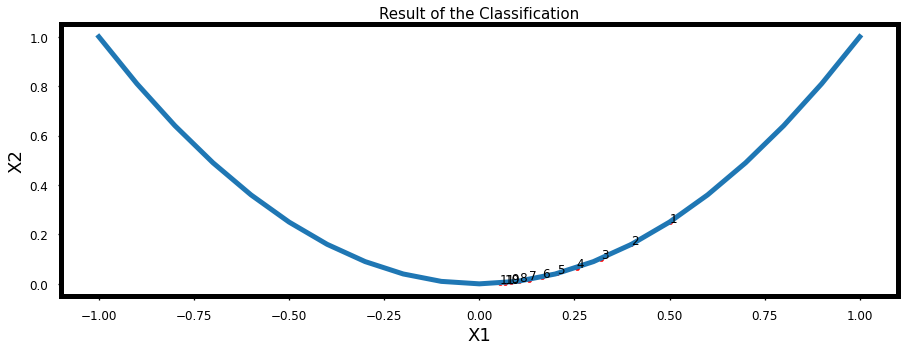

In [80]:
x_hist
y_hist = x_hist**2

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
ax.plot(x_list, y_list)
ax.scatter(x_hist, y_hist, s=20, c = 'r' )

for i in range(len(x_hist)):
    ax.annotate(i+1, (x_hist[i], y_hist[i]), fontsize = 12)

    
print(f'The value of the x after {n_itr} iterations is {x}.\n')    

***Question***

Implement a simple Logistic Regression with pytorch. 


## Simple NN with Pytorch

We'll come back to this with more details. This is just to give an idea of how this works in practice for a NN.

In [81]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train.reshape(-1,1)).float()
y_ts = torch.from_numpy(Y_test.reshape(-1,1)).float()

In [82]:
# https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
# https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [105]:
n_epoch=20
btch_size = 100
lr = .05

In [107]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10,4)
        self.out = nn.Linear(4, 1)
        
        
    def forward(self,x):
            #The first layer
            x = self.fc1(x)
            #Activation function is Relu. Feel free to experiment with this
            x = F.relu(x)
                       
            #The second layer
            x = self.fc2(x)
            x = F.relu(x)
            
            #This produces output
            x = self.out(x)
            x = F.sigmoid(x)
            
            return x

    
net = Net()


In [108]:
net(x_ts[:3])

tensor([[0.4769],
        [0.4873],
        [0.4874]], grad_fn=<SigmoidBackward0>)

In [86]:
for name, param in net.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: fc1.weight | Size: torch.Size([10, 2]) | Values : tensor([[ 0.2378, -0.1808],
        [ 0.2559,  0.6064]], grad_fn=<SliceBackward0>) 

Layer: fc1.bias | Size: torch.Size([10]) | Values : tensor([-0.1211,  0.4329], grad_fn=<SliceBackward0>) 

Layer: fc2.weight | Size: torch.Size([4, 10]) | Values : tensor([[-0.2109,  0.0759, -0.1781, -0.0913, -0.1012, -0.0784,  0.0853, -0.0405,
         -0.2317,  0.1319],
        [-0.2401,  0.2031, -0.2309, -0.1058,  0.0213, -0.2975,  0.2573, -0.0571,
          0.0882,  0.0829]], grad_fn=<SliceBackward0>) 

Layer: fc2.bias | Size: torch.Size([4]) | Values : tensor([ 0.2826, -0.2434], grad_fn=<SliceBackward0>) 

Layer: out.weight | Size: torch.Size([1, 4]) | Values : tensor([[ 0.4527, -0.0867,  0.1143,  0.1605]], grad_fn=<SliceBackward0>) 

Layer: out.bias | Size: torch.Size([1]) | Values : tensor([0.4511], grad_fn=<SliceBackward0>) 



### Loss

In [110]:
## Define a loss function: WE are using binary cross-entropy 
criterion = nn.BCELoss()

### Optimizer

In [111]:
# optim.SGD(model.parameters(), lr=lr)
## Here I am using adam for optimizer
optimizer = optim.Adam(net.parameters(), lr= lr , betas=(0.9, 0.999))


In [112]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train.reshape(-1,1)).float()
y_ts = torch.from_numpy(Y_test.reshape(-1,1)).float()

In [98]:
y_tr.size()

torch.Size([7101, 1])

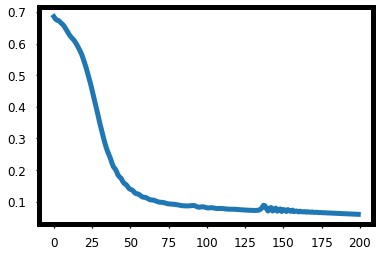

In [113]:
#We also need to keep track of the loss. 
losses = []

for i in range(200):
    
    #Precit the output for Given input
    y_pred = net.forward(x_tr)
    
    #Compute Cross entropy loss
    loss = criterion( y_pred , y_tr)
    losses += [loss]
    
   
    #Clear the previous gradients
    optimizer.zero_grad()

    #Compute gradients
    loss.backward()

    #Update the weights
    optimizer.step()

    
    
plt.plot(losses)    

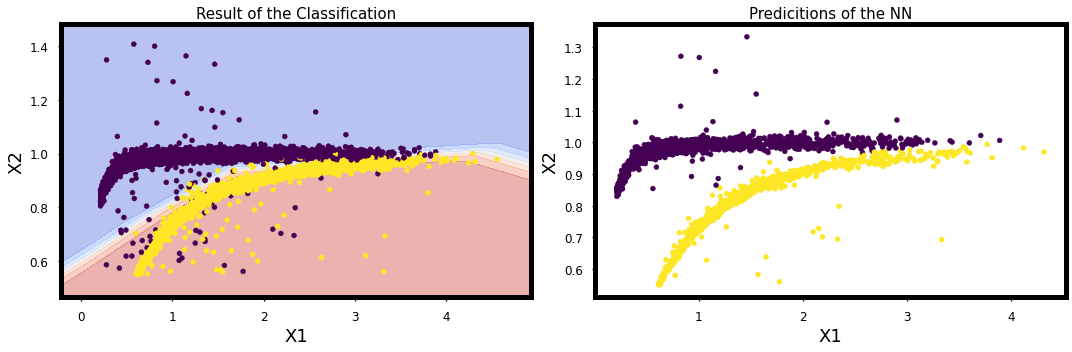

In [114]:
#predictions of the model for test set
y_predict = (net.forward(x_ts)>.5).numpy().astype(int)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = net.forward( torch.from_numpy(X_grid).float() )
Y_grid = Y_grid.detach().numpy().reshape(x1_list.shape )

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'X1', ylabel='X2', title = 'Predicitions of the NN')
plt.scatter(*X_test.T, c = y_predict.reshape(-1))


plt.tight_layout()
plt.show()

## Cleaned up

In [ ]:
import torch
from torch import nn
# from torch.utils.data import DataLoader


### Data

In [ ]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train.reshape(-1,1)).float()
y_ts = torch.from_numpy(Y_test.reshape(-1,1)).float()

In [ ]:
## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)

### Hyper-parameters

In [ ]:
n_epoch=30
btch_size = 100
lr = .2

### Model definition

In [ ]:
### This is slightly simplified compared to the earlier version.

class NeuralNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.ff = nn.Sequential( 
            nn.Linear(2,10), 
            nn.ReLU(), 
            nn.Linear(10,5), 
            nn.ReLU(), 
            nn.Linear(5,1), 
            nn.Sigmoid()         
        )
        
    def forward(self,x):
            return self.ff(x)

    
model = NeuralNet()

In [ ]:
### Loss
criterion = nn.BCELoss()

### Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


### Training loops

In [ ]:
## https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

def train_loop(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # print(batch)
        # Compute prediction and loss
        pred = model(X)
        loss = criterion(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 100 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
    print(f"loss: {loss:>4f}")
    return loss.item()


def test_loop(dataloader, model, criterion):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += criterion(pred, y).item()
            correct += ( (pred>.5) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return [test_loss, correct]

In [ ]:
train_loop(train_loader, model, criterion, optimizer)

loss: 0.659857


0.6598567366600037

In [ ]:
print(net(x_ts[:5]))
print(net(x_ts[:5])>.5)
print(y_ts[:5])

#### Training

In [ ]:
training_hist = []
test_hist = []

for t in range(n_epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    training_hist += [train_loop(train_loader, model, criterion, optimizer)]
    test_hist += [test_loop(test_loader, model, criterion)]
print("Done!")

Epoch 1
-------------------------------
loss: 0.394635
Test Error: 
 Accuracy: 63.2%, Avg loss: 0.004972 

Epoch 2
-------------------------------
loss: 0.340504
Test Error: 
 Accuracy: 81.9%, Avg loss: 0.004020 

Epoch 3
-------------------------------
loss: 0.443844
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.004781 

Epoch 4
-------------------------------
loss: 0.434411
Test Error: 
 Accuracy: 87.8%, Avg loss: 0.002668 

Epoch 5
-------------------------------
loss: 0.272052
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.002365 

Epoch 6
-------------------------------
loss: 0.298310
Test Error: 
 Accuracy: 63.8%, Avg loss: 0.012258 

Epoch 7
-------------------------------
loss: 0.306415
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.003034 

Epoch 8
-------------------------------
loss: 0.165058
Test Error: 
 Accuracy: 95.0%, Avg loss: 0.001549 

Epoch 9
-------------------------------
loss: 0.057944
Test Error: 
 Accuracy: 92.6%, Avg loss: 0.001512 

Epoch 10
----------------------------

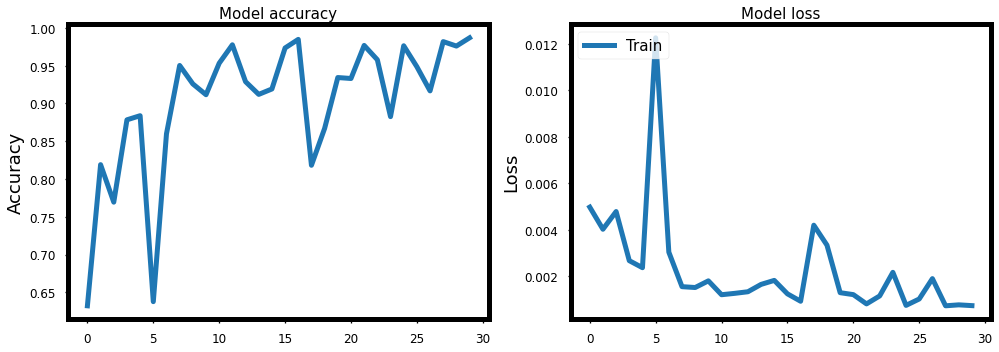

In [ ]:
test_hist = np.array(test_hist)
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
# plt.plot(history.history['acc'])
plt.plot(test_hist[:, 1])
# plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
# plt.plot(training_hist)
plt.plot(test_hist[:, 0])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### Saving the model

In [ ]:
model.state_dict()

OrderedDict([('ff.0.weight', tensor([[ 1.0703e-01,  1.1451e+00],
                      [ 1.1472e+00,  1.8276e-01],
                      [-5.4885e-01, -5.0000e-01],
                      [-7.2386e-01,  3.7773e+00],
                      [-2.6042e-01,  3.0561e+00],
                      [-2.0443e-01, -6.2285e-01],
                      [-6.8012e-01,  2.5334e-02],
                      [-3.9321e-01, -3.9658e-03],
                      [-7.0395e-01,  4.6440e-01],
                      [-3.7914e-01,  5.7662e+00]])),
             ('ff.0.bias',
              tensor([-0.6386, -1.7749,  0.0327, -1.9725, -1.9893, -0.5635, -0.5078,  0.0876,
                      -0.2430, -4.3004])),
             ('ff.2.weight',
              tensor([[-2.8973e-01, -8.0818e-02, -2.9515e-01,  2.5266e-01, -2.1171e-01,
                       -9.4731e-02,  1.8311e-01,  1.7763e-01, -1.7316e-01,  1.4533e-01],
                      [ 1.6276e-01,  7.3395e-02,  2.2643e-01,  1.3349e+00,  5.9632e-01,
                       -

In [ ]:
## Save the model
# https://pytorch.org/docs/stable/notes/serialization.html

PATH = 'test_model'
torch.save(model.state_dict(), PATH)

In [ ]:
## Load a saved model
nn_state_dict = torch.load('test_model')
new_model = NeuralNet()
new_model.load_state_dict(nn_state_dict)
new_model(x_ts[:3])

tensor([[0.0070],
        [0.0070],
        [0.0070]], grad_fn=<SigmoidBackward>)

## Visualization

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=e1f2b1ee3310f12e919b2d7faf9da800832c2bfbc7737c11ab546a23102c3c58
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


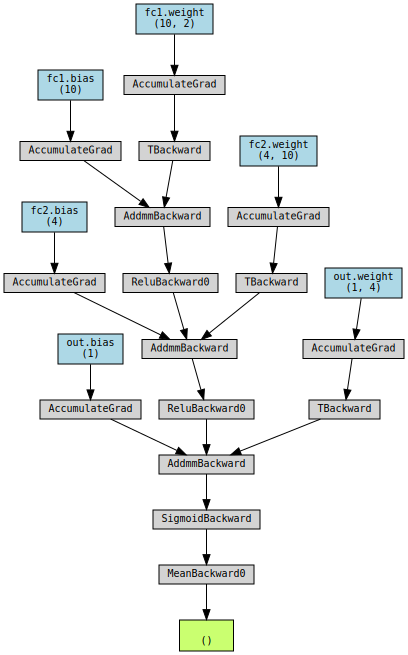

In [ ]:
'''
Later, we will use tensorboard for more visualization. 
'''
# https://github.com/szagoruyko/pytorchviz
!pip install torchviz
from torchviz import make_dot


y_predict = (net.forward(x_ts) )
make_dot( y_predict.mean(),  params=dict(net.named_parameters() )  , 
          # show_attrs=True, show_saved=True
         )

## Data: Farsi Hand-written digits classification

In [ ]:
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

# X = np.load('X.npz')['arr_0']
# Y = np.load('Y.npz')['arr_0']


from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [ ]:
print('Each image is of the form: {}'.format(X[0].shape ) )

Each image is of the form: (32, 32)


8

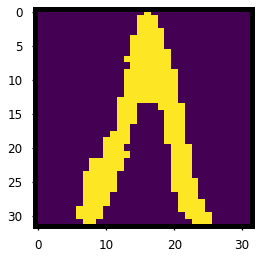

In [ ]:
plt.imshow(X[270])
X.reshape(-1, 32*32).shape
Y[270]

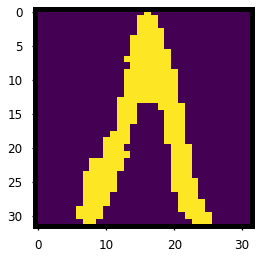

In [ ]:
plt.imshow(X[270])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)